In [1]:
# --- Load Agents --- #
from agents.agent_reinforce.agent import REINFORCEAgent
from agents.agent_deepqn.agent import DeepQAgent
# from agents.agent_ddpg.agent import DDPG_Agent
# from agents.agent_ppo.agent import PPOAgent

# --- Load Environments --- #
from environment.grid import GridEnv
# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten
from utilities.profiler import profile

# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2



C:\Users\danie\anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Experiments

In [2]:
from agents.agent_reinforce.agent import REINFORCEAgentConfig
from agents.agent_deepqn.agent import DeepQAgentConfig


In [13]:
    num_episodes = 120
    max_t = 100

    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of dqn:  state_size, action_size, config = DeepQAgentConfig(), seed = 1, samp_frames=1
    init of rei:  state_size, action_size, config = REINFORCEAgentConfig(), seed = 1 <- no hidden layer!
    """

'\norder of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic \ninit environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False\ninit of dqn:  state_size, action_size, config = DeepQAgentConfig(), seed = 1, samp_frames=1\ninit of rei:  state_size, action_size, config = REINFORCEAgentConfig(), seed = 1 <- no hidden layer!\n'

# Experiment Batch 1

In [4]:
from experiments.experiment_list import exp1_dqn, exp1_rei

## Experiment Batch 1 - DQN

In [5]:
dqn_experiments = []
for i, config in enumerate(exp1_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 1 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

1


 Total score (averaged over agents) 199 episode: 19.0 | 	Avarage in last 100 is 19.0Scores saved!


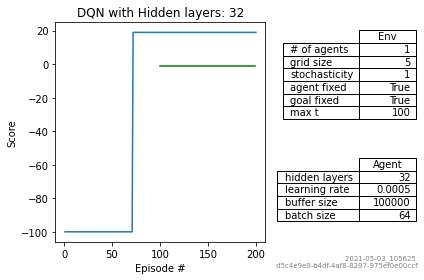

In [6]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 1 - REINFORCE

In [10]:
rei_experiments = []
for i, config in enumerate(exp1_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 1 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

16


 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is 18.6Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 16.52Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 17.58Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is 17.78Scores saved!
 Total score (averaged over agents) 1999 episode: 13.0 | 	Avarage in last 100 is -18.43Scores saved!
 Total score (averaged over agents) 1999 episode: -7.0 | 	Avarage in last 100 is -6.47Scores saved!
 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is -10.95Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is -2.82Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 12.29Scores saved!
 Total score (averaged over agents) 1999 episode: 10.0 | 	Avarage in last 100 is 13.91Scores saved!

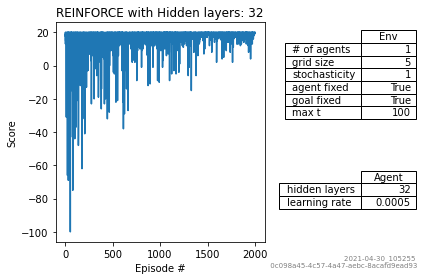

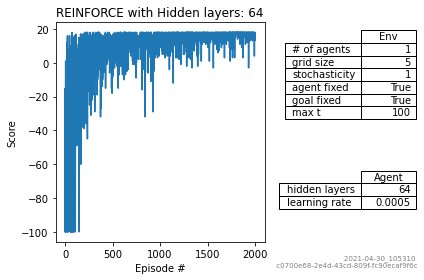

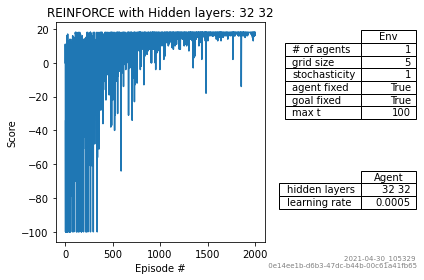

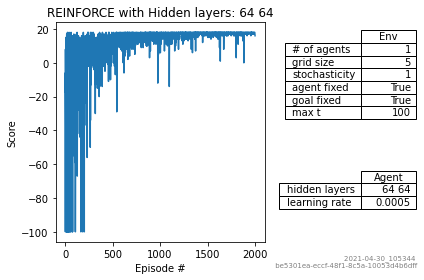

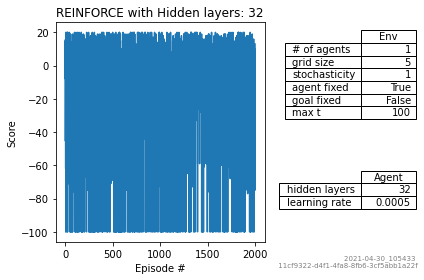

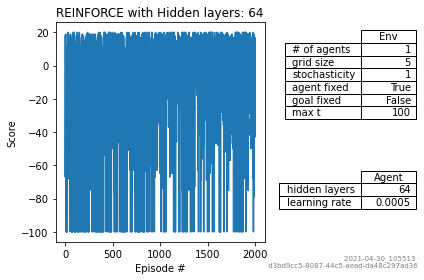

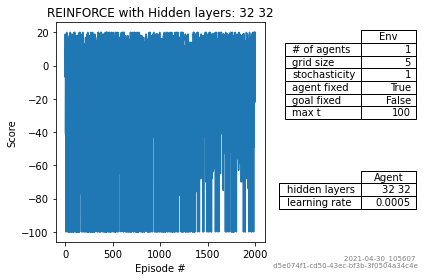

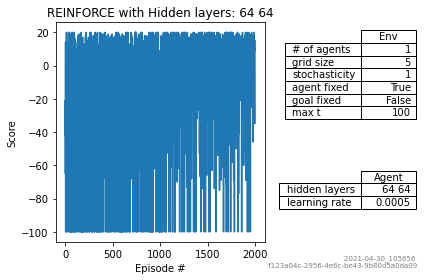

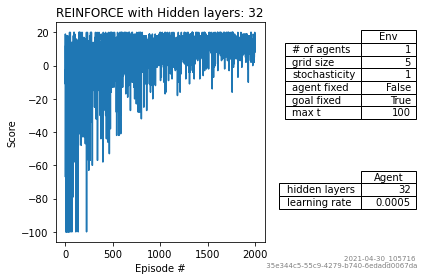

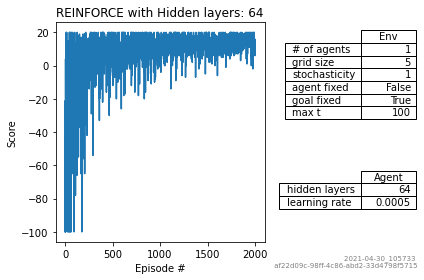

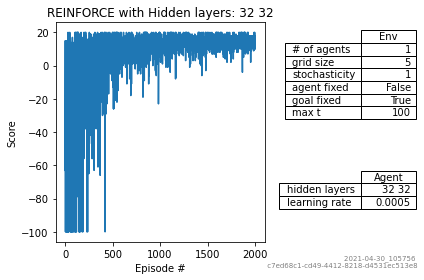

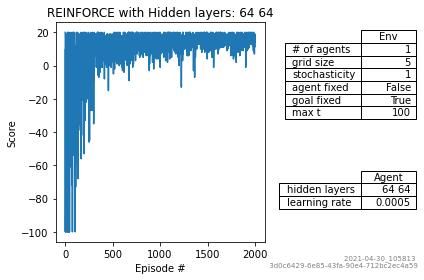

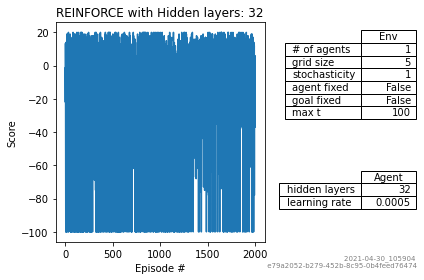

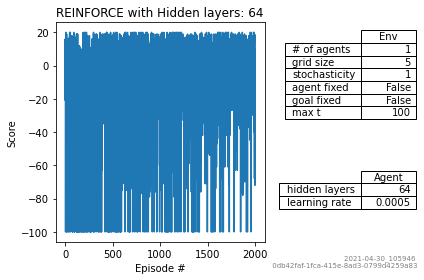

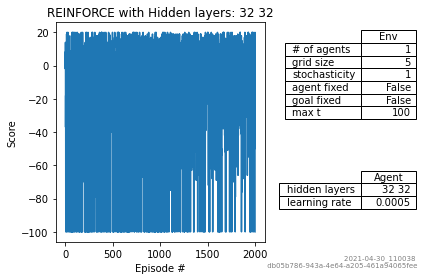

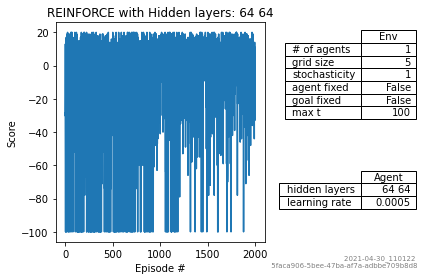

In [11]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 2

In [12]:
from experiments.experiment_list import exp2_dqn, exp2_rei

## Experiment Batch 2 - DQN

In [13]:
dqn_experiments = []
for i, config in enumerate(exp2_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 2 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

4


 Total score (averaged over agents) 1999 episode: 13.0 | 	Avarage in last 100 is 5.53Scores saved!
 Total score (averaged over agents) 1999 episode: 1.0 | 	Avarage in last 100 is 2.08Scores saved!
 Total score (averaged over agents) 1999 episode: 6.0 | 	Avarage in last 100 is 10.48Scores saved!
 Total score (averaged over agents) 1999 episode: 19.0 | 	Avarage in last 100 is 9.03Scores saved!


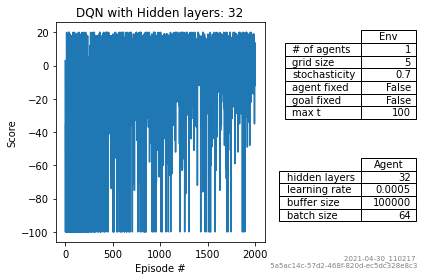

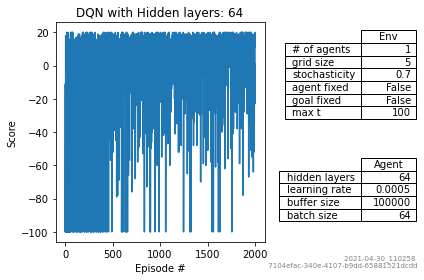

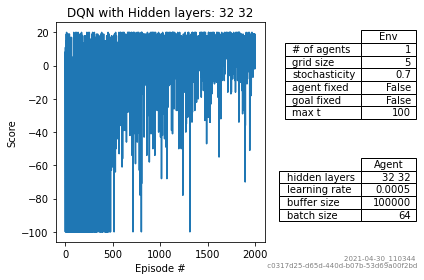

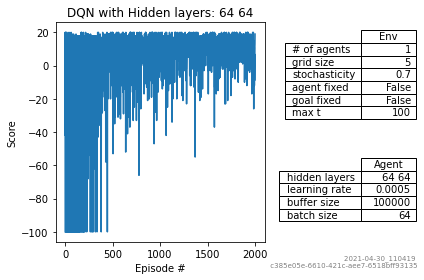

In [14]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 2 - REINFORCE

In [15]:
rei_experiments = []
for i, config in enumerate(exp1_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 2 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

16


 Total score (averaged over agents) 1999 episode: 4.0 | 	Avarage in last 100 is 2.14Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 16.26Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 16.89Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 16.73Scores saved!
 Total score (averaged over agents) 1999 episode: 14.0 | 	Avarage in last 100 is -20.85Scores saved!
 Total score (averaged over agents) 1999 episode: -9.0 | 	Avarage in last 100 is -11.13Scores saved!
 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is -18.13Scores saved!
 Total score (averaged over agents) 1999 episode: 13.0 | 	Avarage in last 100 is 3.86Scores saved!
 Total score (averaged over agents) 1999 episode: 11.0 | 	Avarage in last 100 is 13.0Scores saved!
 Total score (averaged over agents) 1999 episode: 4.0 | 	Avarage in last 100 is 13.43Scores saved!
 T

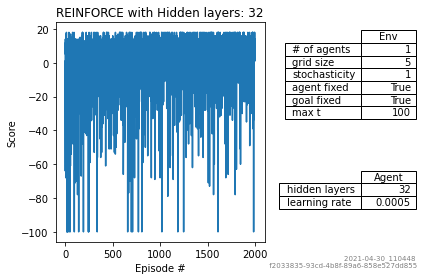

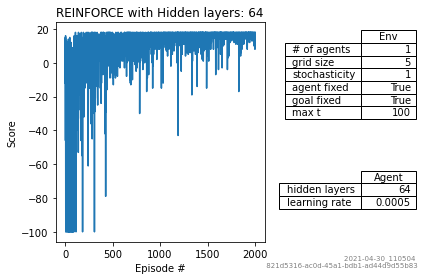

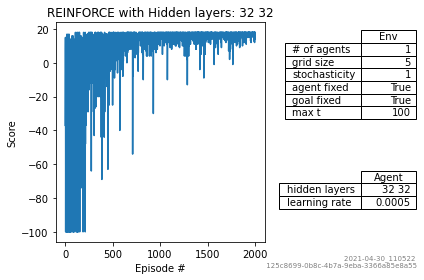

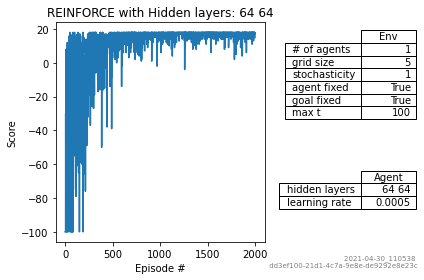

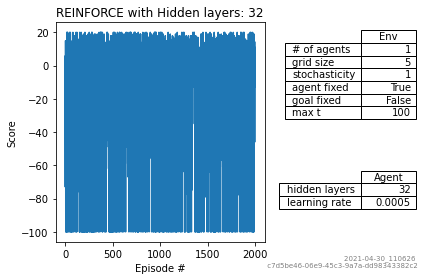

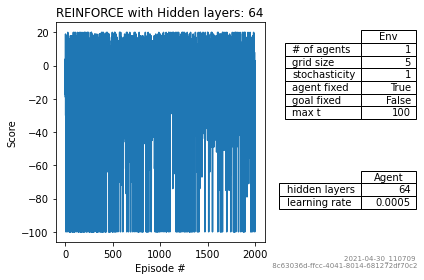

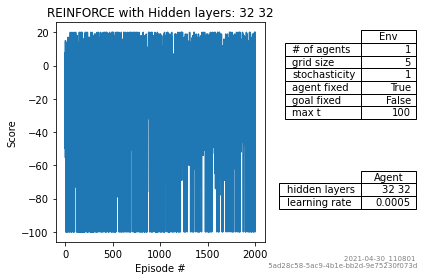

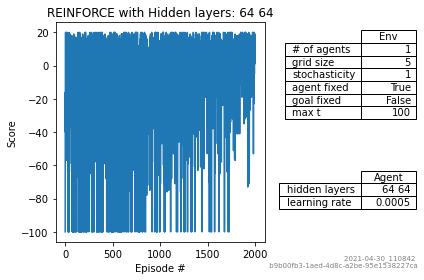

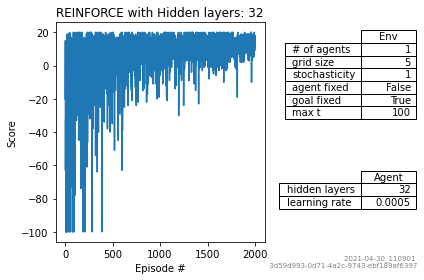

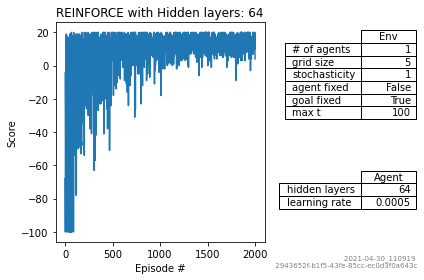

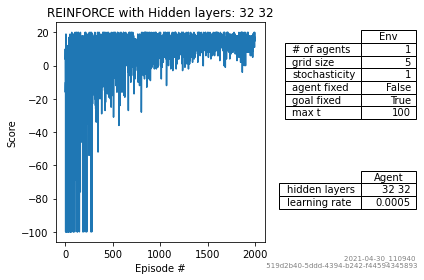

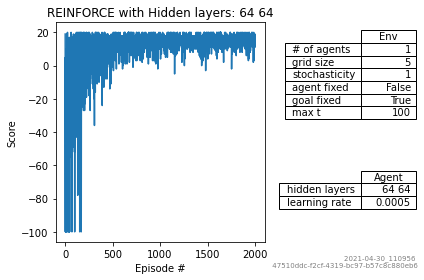

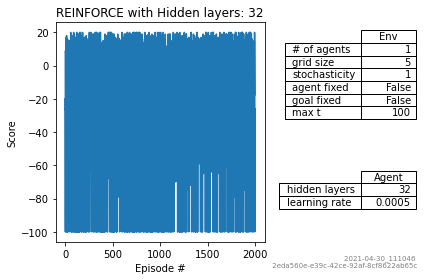

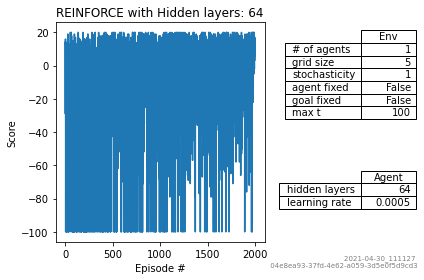

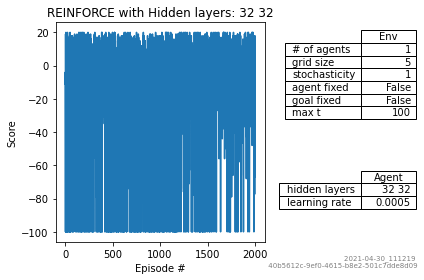

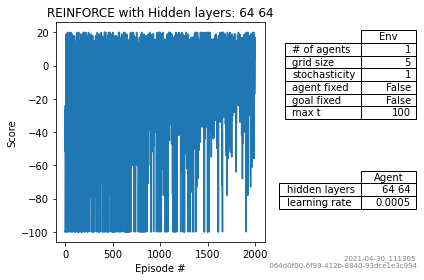

In [16]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 3

In [4]:
from experiments.experiment_list import exp3_dqn, exp3_rei

## Experiment Batch 3 - DQN

In [24]:
dqn_experiments = []
for i, config in enumerate(exp3_dqn[:1]):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 3 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

1


 Total score (averaged over agents) 119 episode: -132.5 | 	Avarage in last 100 is -67.89Scores saved!
[array([-708., -708.]), array([-600., -579.]), array([-689., -689.]), array([-594., -594.]), array([-211., -190.])]
[-708.0, -579.0, -689.0, -594.0, -190.0]
[array([-121.55, -114.72, -108.77, -101.69,  -95.6 ,  -94.25,  -94.18,
        -93.1 ,  -87.59,  -87.66,  -81.52,  -79.55,  -77.98,  -78.34,
        -74.32,  -74.41,  -70.81,  -63.83,  -61.68,  -61.66,  -58.65])]
1


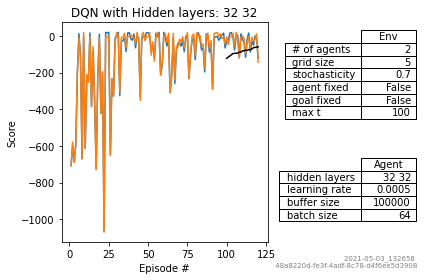

In [23]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 3 - REINFORCE

In [20]:
rei_experiments = []
for i, config in enumerate(exp3_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 3 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

4


 Total score (averaged over agents) 1999 episode: -31.5 | 	Avarage in last 100 is -31.64Scores saved!
 Total score (averaged over agents) 1999 episode: 7.5 | 	Avarage in last 100 is -30.15Scores saved!
 Total score (averaged over agents) 1999 episode: -42.0 | 	Avarage in last 100 is -35.36Scores saved!
 Total score (averaged over agents) 1999 episode: -34.333333333333336 | 	Avarage in last 100 is -33.96Scores saved!


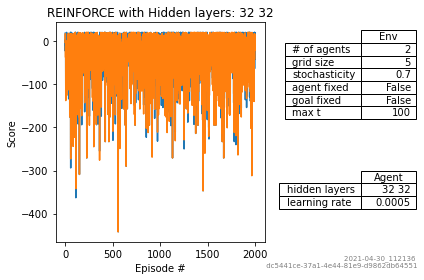

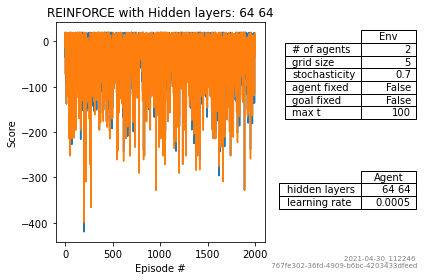

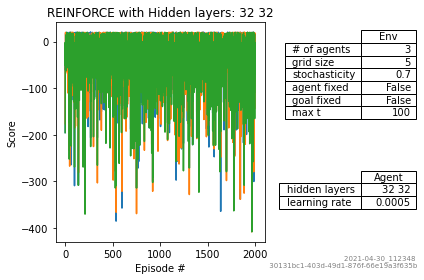

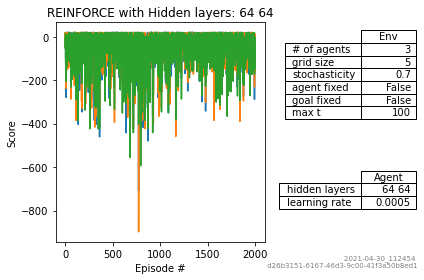

In [21]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 4 - To be decided later!

In [22]:
from experiments.experiment_list import exp4_dqn, exp4_rei

## DQN

In [23]:
dqn_experiments = []
for i, config in enumerate(exp4_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 4 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

4


 Total score (averaged over agents) 1999 episode: -19.5 | 	Avarage in last 100 is -69.475Scores saved!
 Total score (averaged over agents) 1999 episode: 9.5 | 	Avarage in last 100 is -89.005Scores saved!
 Total score (averaged over agents) 1999 episode: 5.0 | 	Avarage in last 100 is -72.82666666666667Scores saved!
 Total score (averaged over agents) 1999 episode: -7.0 | 	Avarage in last 100 is -113.91Scores saved!


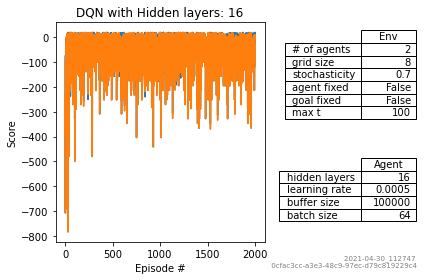

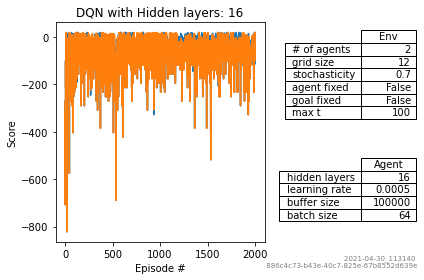

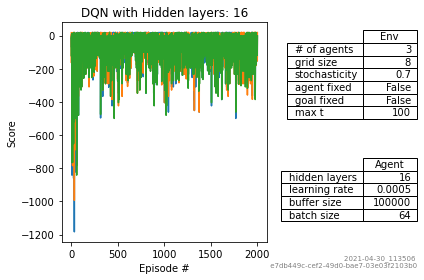

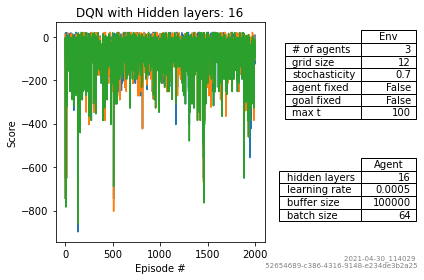

In [24]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## REINFORCE

In [25]:
rei_experiments = []
for i, config in enumerate(exp4_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 4 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

4


 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -51.98Scores saved!
 Total score (averaged over agents) 1999 episode: -54.5 | 	Avarage in last 100 is -79.0Scores saved!
 Total score (averaged over agents) 1999 episode: 3.0 | 	Avarage in last 100 is -51.43333333333333Scores saved!
 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -78.47Scores saved!


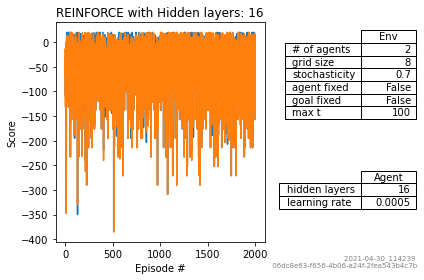

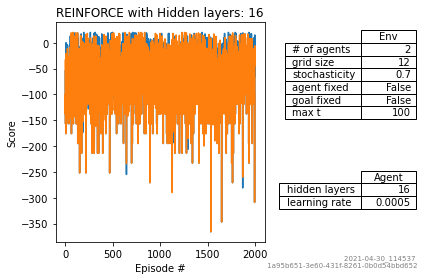

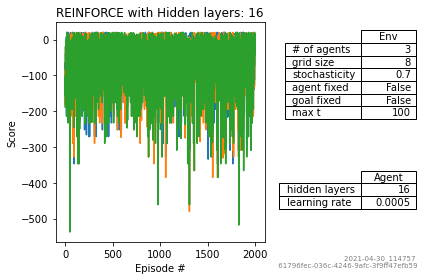

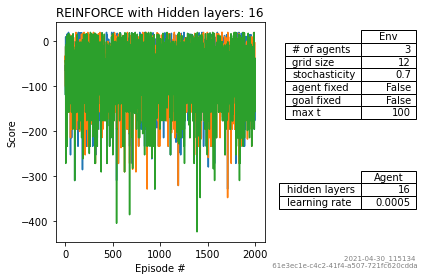

In [26]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)